# VERIFICA LEGGE DI OHM

OBIETTIVO: verificare V=RI

PROCEDIMENTO: resistenza fissata, variata tensione e misurata corrente

In [1]:
import pandas as pd # nicolo
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
FILE = dir_path + '/data/' + 'VRI.csv'

from interpolazione import RettaInterpolata, final_val

In [2]:
fr = pd.read_csv(FILE)

R = 2.0 * 10**6 # usata resistenza 2MΩ, non applico -0.2 ohm
sigmaRpercent = 0.03
sigmaR = R*sigmaRpercent

V = np.array(fr['V'])
sigmaVpercent = 0.01
sigmaV = V * sigmaVpercent

I = np.array(fr['I(uA)']) * 10**-6 # micro ampere
sigmaIpercent = 0.01
sigmaI = I * sigmaIpercent

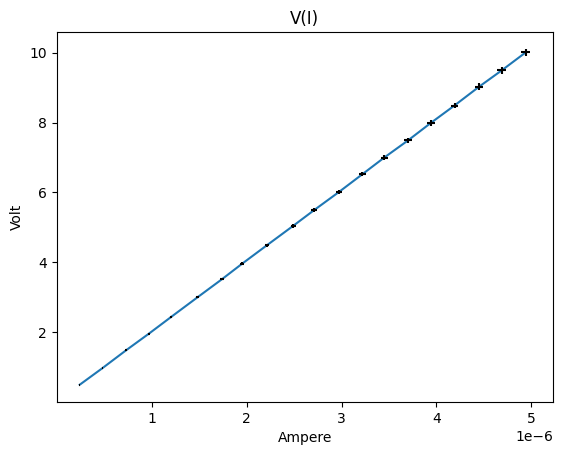


linearità A + BX
    
A: -0.0015949412307977447 
B: 2026954.5664458114
sigmaA: 0.003226842257473602
sigmaB: 1091.768527614701

sigmaY: 0.01    
chiquadro ridotto: 0.39
df: 18
pvalue: 100.0%


In [3]:
r = RettaInterpolata(I,V,0.01)
plt.title('V(I)')
plt.plot(r.X,r.Y)
plt.errorbar(I,V,yerr=sigmaV,xerr=sigmaI,fmt=' ',color='red',ecolor='black')
plt.ylabel('Volt')
plt.xlabel('Ampere')
plt.show()
print(r)

In [4]:
R_i = r.B
sigmaR_i = r.sigmaB

t = np.abs(R-R_i)/np.sqrt(sigmaR**2 + sigmaR_i**2)

print('T-test: ',t)
print('t-value: ',2*sc.norm.cdf(-t,0,1)) # area esterna a t

T-test:  0.44916842051140304
t-value:  0.6533101663657905


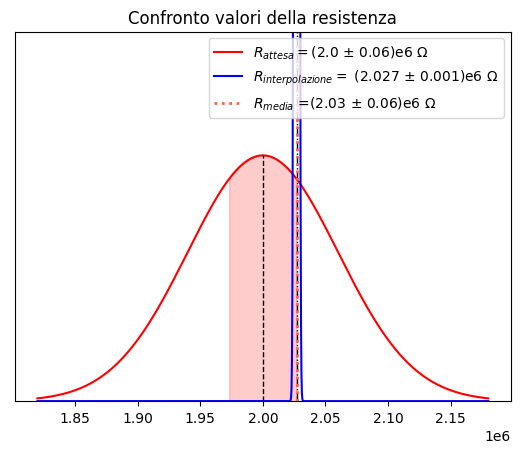

In [7]:
plt.title('Confronto valori della resistenza')
avgR = np.average([R,R_i],weights=[1/(sigmaR**2),1/(sigmaR_i**2)])
sigmaRR = np.sqrt(sigmaR**2 + sigmaR_i**2)
# print(R,R_i,avgR)

m,M = np.min([R-3*sigmaR,R_i-3*sigmaR_i]),np.max([R+3*sigmaR,R_i+3*sigmaR_i])

# print(m,M)
x = np.linspace(m,M,1000)

n1 = sc.norm.pdf(x,loc=R,scale=sigmaR)
plt.plot(x,n1, color='red', label='$R_{attesa} =$' + final_val(R,sigmaR,decimals=2,exp=6,udm='Ω'))
t = np.abs(R - avgR) / sigmaR
plt.fill_between(x= x,y1= n1,where= (R- t*sigmaR < x)&(x < R + t*sigmaR),color= "red",alpha= 0.2)
plt.vlines(x=R,ymin=0,ymax=max(n1),linewidths=1.0,label="", color='black',linestyle="--")

n2 = sc.norm.pdf(x,loc=R_i,scale=sigmaR_i)
plt.plot(x,n2, color='blue', label='$R_{interpolazione} =$ '+ final_val(R_i,sigmaR_i,decimals=3,exp=6,udm='Ω'))
t = np.abs(R_i - avgR) / sigmaR_i
plt.fill_between(x= x,y1= n2,where= (R_i- t*sigmaR_i < x)&(x < R_i + t*sigmaR_i),color= "blue",alpha= 0.2)
plt.vlines(x=R_i,ymin=0,ymax=max(n2),linewidths=1.0,label="", color='black',linestyle="-.")

plt.vlines(x=avgR,ymax=max(n2),ymin=0,linewidths=2.0,label="$R_{media}$ =" + final_val(avgR,sigmaRR,exp=6,udm='Ω'), color='#FF6347',linestyle="dotted")

plt.ylim(0,0.00001)
# plt.xticks()
# plt.xlim(1.95* (10**6),2.05* (10**6))
plt.yticks([])
plt.legend()
plt.show()